T-SNE is a probablistic randomised algorithm. hence running it each time gives slightly different results. for better understanding of your results it is necessary to run the T-SNE algorithm couple for times by increasing the perplexity slowly untill results starts coming similar. Then it is better to increase the # iterations slowly and see where it stablizes.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://colah.github.io/posts/2014-10-Visualizing-MNIST/

https://distill.pub/2016/misread-tsne/

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tsne groups points based on visual similarity. eg: datapoint belonging to class 2 looks similar to one will be closer to the clusters containing 1. Means because they are visually similar are are closer to each other.

In [4]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [5]:
df=df.iloc[:15000]

In [7]:
label = df['label']
df.drop('label',axis=1,inplace=True)


In [8]:
df.shape

(15000, 784)

this can be applied for Standardised data. SO first step is to standardise the dataset.

In [9]:
data = StandardScaler().fit_transform(df)

In [10]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

t-sne takes more time to run for large number of datapoints. so lets check by taking only 1000 points


In [11]:
data_1000 = data[:1000]
label_1000 = label[:1000] 

Running the model with default parameters 
learning rate=200
 ,perplexity=30
 ,iterations=1000

In [13]:
# default learning rate=200, perplexity=30
model = TSNE(n_components=2,n_iter=1000,random_state=0)# random state is because tsne is randomised algo so it is necessary to get similar results
tsne_data = model.fit_transform(data_1000)

this is the data in reduced dimensions(2D)

In [14]:
tsne_data

array([[-12.055835  ,   0.13138416],
       [ 35.931915  , -19.84253   ],
       [ -6.097182  , -16.539968  ],
       ...,
       [-42.780342  ,   3.9669106 ],
       [ 53.49659   ,   6.9622307 ],
       [-26.053621  ,  20.495113  ]], dtype=float32)

In [15]:
final_1000 = pd.DataFrame(tsne_data,columns=['Dim_1','Dim_2'])

In [16]:
final_1000['label'] = label_1000

In [18]:
final_1000.head()

,Dim_1,Dim_2,label
0,-12.055835,0.131384,1
1,35.931915,-19.842529,0
2,-6.097182,-16.539968,1
3,-16.762907,18.351450,4
4,37.939686,-24.678358,0


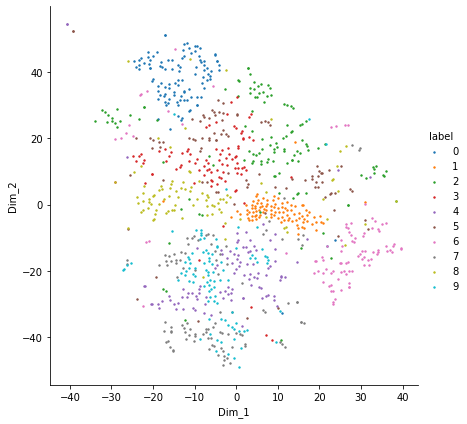

In [28]:
sns.FacetGrid(final_1000,height=6,hue='label').map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

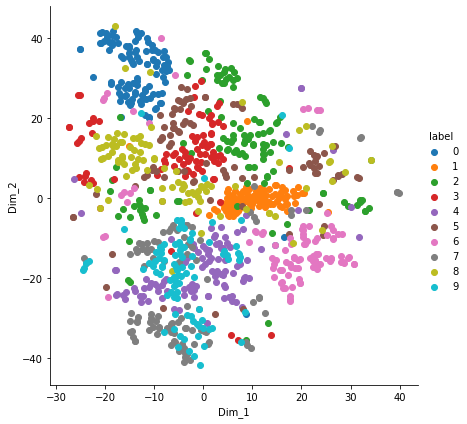

In [20]:
# running with changed perplexity 

# default learning rate=200
model = TSNE(n_components=2,n_iter=1000,random_state=0,perplexity=50)# random state is because tsne is randomised algo so it is necessary to get similar results
tsne_data = model.fit_transform(data_1000)
final_1000 = pd.DataFrame(tsne_data,columns=['Dim_1','Dim_2'])
final_1000['label'] = label_1000
sns.FacetGrid(final_1000,height=6,hue='label').map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

Since perplexity 30 and 50 seems to similar hence it is a bit stable for 1000 iterations. So now keeping perplexity @50 lets change the # of iterations

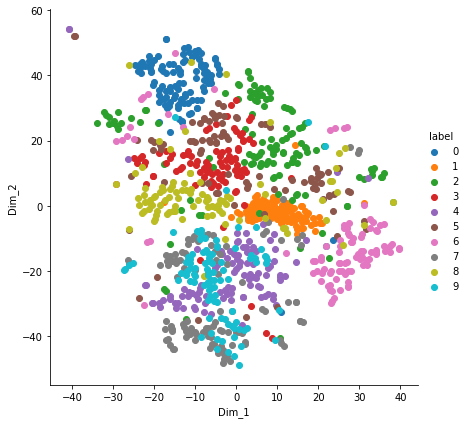

In [21]:
model = TSNE(n_components=2,n_iter=5000,random_state=0,perplexity=50)# random state is because tsne is randomised algo so it is necessary to get similar results
tsne_data = model.fit_transform(data_1000)
final_1000 = pd.DataFrame(tsne_data,columns=['Dim_1','Dim_2'])
final_1000['label'] = label_1000
sns.FacetGrid(final_1000,height=6,hue='label').map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

looking similar to previous hence is stable at this point

# lets try with 15k points

In [22]:
data_15000 = data[:15000]
label_15000 = label[:15000]

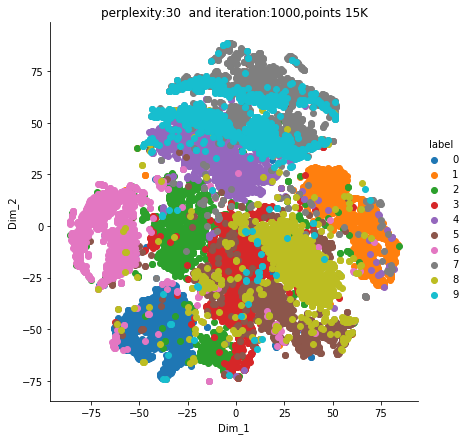

In [24]:
model = TSNE(n_components=2,n_iter=1000,random_state=0,perplexity=30)# random state is because tsne is randomised algo so it is necessary to get similar results
tsne_data = model.fit_transform(data_15000)
final_15000 = pd.DataFrame(tsne_data,columns=['Dim_1','Dim_2'])
final_15000['label'] = label_15000
sns.FacetGrid(final_15000,height=6,hue='label').map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('perplexity:30  and iteration:1000,points 15K')
plt.show()

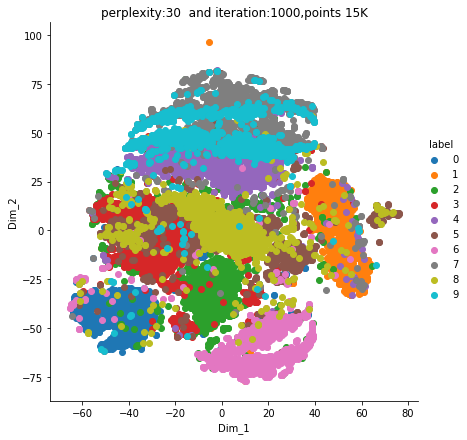

In [25]:
model = TSNE(n_components=2,n_iter=1000,random_state=0,perplexity=50)# random state is because tsne is randomised algo so it is necessary to get similar results
tsne_data = model.fit_transform(data_15000)
final_15000 = pd.DataFrame(tsne_data,columns=['Dim_1','Dim_2'])
final_15000['label'] = label_15000
sns.FacetGrid(final_15000,height=6,hue='label').map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('perplexity:30  and iteration:1000,points 15K')
plt.show()


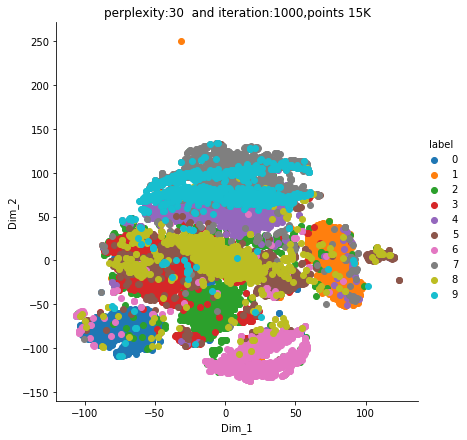

In [26]:
model = TSNE(n_components=2,n_iter=5000,random_state=0,perplexity=50)# random state is because tsne is randomised algo so it is necessary to get similar results
tsne_data = model.fit_transform(data_15000)
final_15000 = pd.DataFrame(tsne_data,columns=['Dim_1','Dim_2'])
final_15000['label'] = label_15000
sns.FacetGrid(final_15000,height=6,hue='label').map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('perplexity:30  and iteration:5000,points 15K')
plt.show()


same plot as above but with smaller markersize

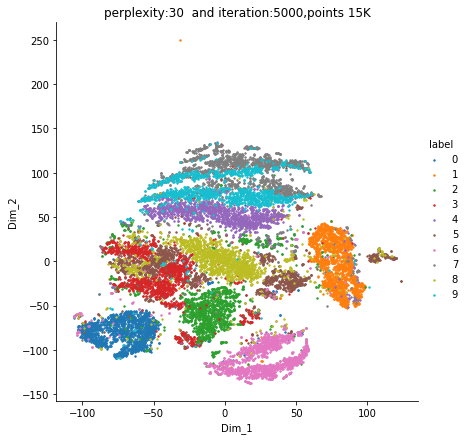

In [29]:
sns.FacetGrid(final_15000,height=6,hue='label').map(plt.scatter,'Dim_1','Dim_2',s=2).add_legend()
plt.title('perplexity:30  and iteration:5000,points 15K')
plt.show()

with 5000 iterations also this gives similar results as 1000 iterations , hence is stable 

We can clearly see some clusters here in the results of the T-sne algoritm, but these cluster sizes doesnot mean anything here, it does a good job in clustering the data together but does not say anything about the cluster sizes.

### And out T-SNE algorithm does a fairly good job in clustering the points together.